<a href="https://colab.research.google.com/github/Kaush80/machine_learning/blob/main/deeplr/Custom_modules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 0, 'x')

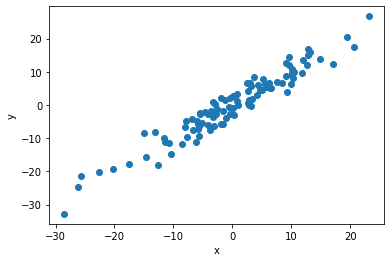

In [ ]:
X=torch.randn(100,1)*10
y=X + 3*torch.randn(100,1)
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

In [ ]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)
  def forward(self, x):
    pred=self.linear(x)
    return pred

In [ ]:
torch.manual_seed(1)
model=LR(1, 1)

In [ ]:
[w,b] =model.parameters()
def get_params():
  return (w[0][0].item(),b[0].item())

In [ ]:
def plot_fit(title):
  plt.title=title
  w1,b1=get_params()
  x1=np.array([-30,30])
  y1=w1*x1+b1
  plt.plot(x1,y1,'r')
  plt.scatter(X,y)
  plt.show()

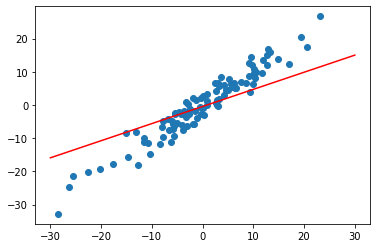

In [ ]:
plot_fit('initial model')

In [ ]:
#built in loss function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
#one epoch is single pass thhrough entire dataset
epochs = 100
losses=[]
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print('epoch:', i, "Loss:", loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 Loss: 29.176488876342773
epoch: 1 Loss: 27.700782775878906
epoch: 2 Loss: 26.32370376586914
epoch: 3 Loss: 25.038623809814453
epoch: 4 Loss: 23.839405059814453
epoch: 5 Loss: 22.720294952392578
epoch: 6 Loss: 21.675928115844727
epoch: 7 Loss: 20.701305389404297
epoch: 8 Loss: 19.79175567626953
epoch: 9 Loss: 18.942947387695312
epoch: 10 Loss: 18.150794982910156
epoch: 11 Loss: 17.411535263061523
epoch: 12 Loss: 16.72161293029785
epoch: 13 Loss: 16.077733993530273
epoch: 14 Loss: 15.476812362670898
epoch: 15 Loss: 14.915982246398926
epoch: 16 Loss: 14.392560958862305
epoch: 17 Loss: 13.904047966003418
epoch: 18 Loss: 13.448110580444336
epoch: 19 Loss: 13.022577285766602
epoch: 20 Loss: 12.625415802001953
epoch: 21 Loss: 12.25472640991211
epoch: 22 Loss: 11.908740997314453
epoch: 23 Loss: 11.585805892944336
epoch: 24 Loss: 11.284387588500977
epoch: 25 Loss: 11.003046035766602
epoch: 26 Loss: 10.740439414978027
epoch: 27 Loss: 10.495319366455078
epoch: 28 Loss: 10.266515731811523

Text(0.5, 0, 'epochs')

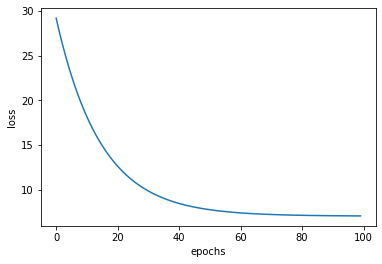

In [ ]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epochs')


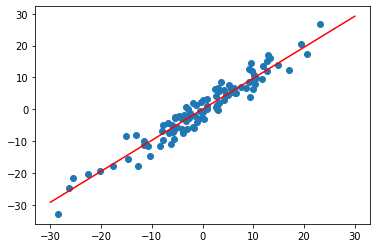

In [ ]:
plot_fit('Trained model')